In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


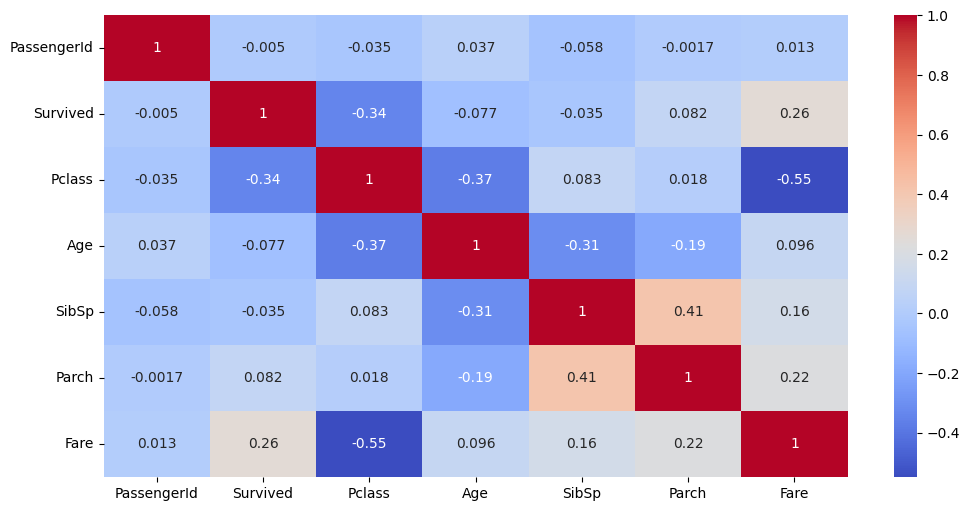

In [5]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(train_set.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [33]:
train_set.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [34]:
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


<Axes: ylabel='count'>

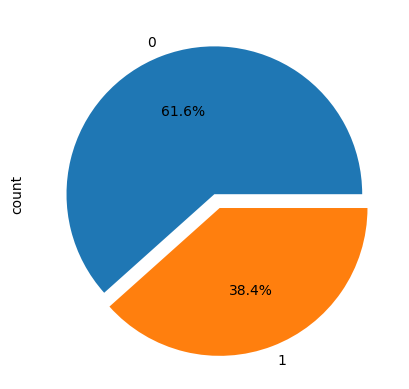

In [8]:
train_set['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

<Axes: ylabel='count'>

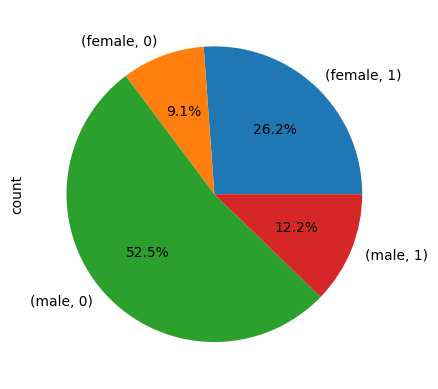

In [9]:
train_set.groupby('Sex')['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Sex', ylabel='count'>

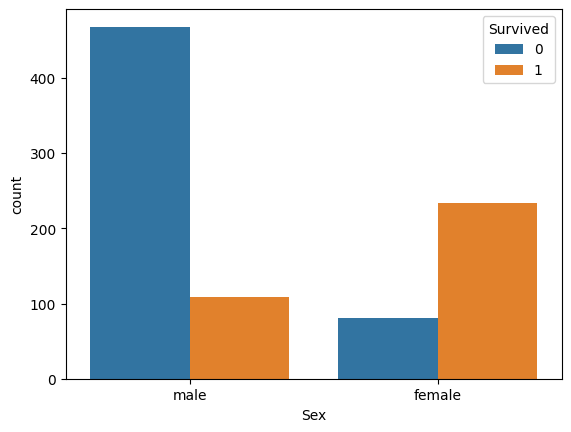

In [10]:
sns.countplot(x='Sex',hue='Survived',data=train_set)

In [53]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_set.fillna({'Embarked':'S'},inplace=True)

In [51]:
imputer=SimpleImputer(strategy='most_frequent')
e=imputer.fit_transform(train_set[['Embarked']])
train_set['Embarked']=e.flatten()

In [52]:
train_set['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [14]:
train_set['Age']=train_set['Age'].fillna(-0.5)
test_set['Age']=test_set['Age'].fillna(-0.5)
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']
bins= [-1,0,5,12,18,25,35,60,np.inf]

train_set['AgeGroup']=pd.cut(train_set['Age'],bins=bins,labels=labels)
test_set['AgeGroup']=pd.cut(test_set['Age'],bins=bins,labels=labels)

In [15]:
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,Student
1,2,1,1,female,38.0,1,0,71.2833,C,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,male,35.0,0,0,8.0500,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Young Adult
887,888,1,1,female,19.0,0,0,30.0000,S,Student
888,889,0,3,female,-0.5,1,2,23.4500,S,Unknown
889,890,1,1,male,26.0,0,0,30.0000,C,Young Adult


In [16]:
encoder=OrdinalEncoder()
train_set['Embarked']=encoder.fit_transform(train_set[['Embarked']])

In [17]:
train_set['AgeGroup']=encoder.fit_transform(train_set[['AgeGroup']])

test_set['AgeGroup']=encoder.fit_transform(test_set[['AgeGroup']])
test_set['Embarked']=encoder.fit_transform(test_set[['Embarked']])

train_set.drop('Age',axis=1)
test_set.drop('Age',axis=1)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,1.0,7.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,2.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,1.0,3.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,2.0,7.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,2.0,6.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2.0,0.0
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,2.0,6.0


In [18]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1.0,7.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1.0,3.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2.0,7.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,2.0,6.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2.0,0.0
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,2.0,6.0


In [19]:
train_set['Sex']=encoder.fit_transform(train_set[['Sex']])

test_set['Sex']=encoder.fit_transform(test_set[['Sex']])

In [20]:
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,1.0,22.0,1,0,7.2500,2.0,4.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0,7.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0,7.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.0,0,0,13.0000,2.0,7.0
887,888,1,1,0.0,19.0,0,0,30.0000,2.0,4.0
888,889,0,3,0.0,-0.5,1,2,23.4500,2.0,6.0
889,890,1,1,1.0,26.0,0,0,30.0000,0.0,7.0


In [21]:
y=train_set['Survived'].copy()
X=train_set.drop('Survived',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model=RandomForestClassifier(random_state=42)

In [23]:
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred=model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [26]:
score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print("CV SCORE :", np.mean(score))

CV SCORE : 0.716276569114938


In [27]:
score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("CV SCORE :", np.mean(score))

CV SCORE : 0.8005417118093174


In [28]:
score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("CV SCORE :", np.mean(score))

CV SCORE : 0.8411070683158345


In [30]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85       105\n           1       0.81      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.82      0.81      0.81       179\nweighted avg       0.82      0.82      0.82       179\n'

In [31]:
confusion_matrix(y_test, y_pred)

array([[92, 13],
       [19, 55]])

In [54]:
titanic_test_set=pd.read_csv('train.csv')

X= titanic_test_set.drop('Survived',axis=1) 
y= titanic_test_set['Survived'].copy()

In [58]:
grid_params={
    'max_depth': [15,20,25],
    'min_samples_split': [3,4,5],
    'n_estimators': [250,265,280]
}

tuned_model=GridSearchCV(
        model,
        grid_params,
        cv=10,
        scoring='accuracy',
        n_jobs=-1
    )

tuned_model.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [15, 20, ...], 'min_samples_split': [3, 4, ...], 'n_estimators': [250, 265, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,250


In [59]:
y_pred=tuned_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8156424581005587
